In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import (
    datasets, metrics, model_selection as skms, naive_bayes, neighbors
)

In [2]:
dataset = datasets.load_iris()

In [6]:
is_versicolor = dataset.target == 1
is_versicolor

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [9]:
(train_ftrs, test_ftrs,
 train_trgt, test_trgt) = skms.train_test_split(dataset.data, is_versicolor, test_size=0.33, random_state=21)
train_ftrs, test_ftrs, train_trgt, test_trgt

(array([[6.9, 3.1, 4.9, 1.5],
        [5. , 3.3, 1.4, 0.2],
        [6.7, 3.1, 4.4, 1.4],
        [7.7, 2.6, 6.9, 2.3],
        [5.7, 2.8, 4.5, 1.3],
        [5.8, 2.7, 4.1, 1. ],
        [4.6, 3.1, 1.5, 0.2],
        [5.1, 3.5, 1.4, 0.3],
        [7.7, 3. , 6.1, 2.3],
        [4.7, 3.2, 1.6, 0.2],
        [5.4, 3.7, 1.5, 0.2],
        [4.6, 3.6, 1. , 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.7, 2.9, 4.2, 1.3],
        [5.5, 2.5, 4. , 1.3],
        [5.2, 3.5, 1.5, 0.2],
        [6.7, 2.5, 5.8, 1.8],
        [6.4, 3.2, 4.5, 1.5],
        [4.9, 3. , 1.4, 0.2],
        [5.4, 3.9, 1.3, 0.4],
        [4.9, 2.5, 4.5, 1.7],
        [6.7, 3.1, 4.7, 1.5],
        [4.9, 3.1, 1.5, 0.2],
        [6.5, 3. , 5.8, 2.2],
        [5. , 2.3, 3.3, 1. ],
        [6.1, 2.6, 5.6, 1.4],
        [5. , 3.5, 1.6, 0.6],
        [6.4, 2.7, 5.3, 1.9],
        [5.1, 3.4, 1.5, 0.2],
        [4.6, 3.2, 1.4, 0.2],
        [6. , 2.9, 4.5, 1.5],
        [6.5, 3. , 5.5, 1.8],
        [5

In [12]:
gnb = naive_bayes.GaussianNB()

In [22]:
pred_true = (gnb.fit(train_ftrs, train_trgt)
            .predict_proba(test_ftrs))[:, 1]
pred_true

array([9.79865278e-01, 4.50222228e-13, 2.43026500e-16, 1.96134602e-14,
       9.52724313e-01, 9.27725695e-01, 3.87639359e-15, 9.08785560e-03,
       6.25366254e-13, 2.86846833e-16, 8.56437615e-01, 9.58804822e-01,
       1.80885105e-09, 2.30342507e-14, 7.70249873e-11, 2.63886933e-01,
       2.35755590e-01, 9.61031568e-01, 4.93114034e-20, 4.99637540e-02,
       3.19020482e-01, 8.89388199e-01, 7.87938780e-01, 9.65605388e-01,
       1.77131933e-17, 3.93653599e-01, 3.83266628e-16, 1.66566751e-14,
       9.79533423e-01, 1.44515245e-06, 5.14903222e-15, 2.87187505e-11,
       1.06081289e-01, 2.48727276e-17, 3.48004665e-01, 9.37375446e-01,
       3.94941566e-01, 4.69745755e-08, 4.67316571e-17, 4.99637540e-02,
       1.15989808e-01, 2.20299432e-10, 1.02490253e-02, 9.71297885e-01,
       1.50873250e-07, 2.25970036e-17, 2.59459411e-19, 5.75243418e-20,
       9.58230930e-01, 4.68228921e-16])

In [26]:
fpr, tpr, threshold = metrics.roc_curve(test_trgt, pred_true)

In [32]:
auc = metrics.auc(fpr, tpr)
print(f"FPR: {fpr}\nTPR: {tpr}")

FPR: [0.         0.         0.         0.06060606 0.06060606 0.12121212
 0.12121212 0.18181818 1.        ]
TPR: [0.         0.05882353 0.88235294 0.88235294 0.94117647 0.94117647
 1.         1.         1.        ]


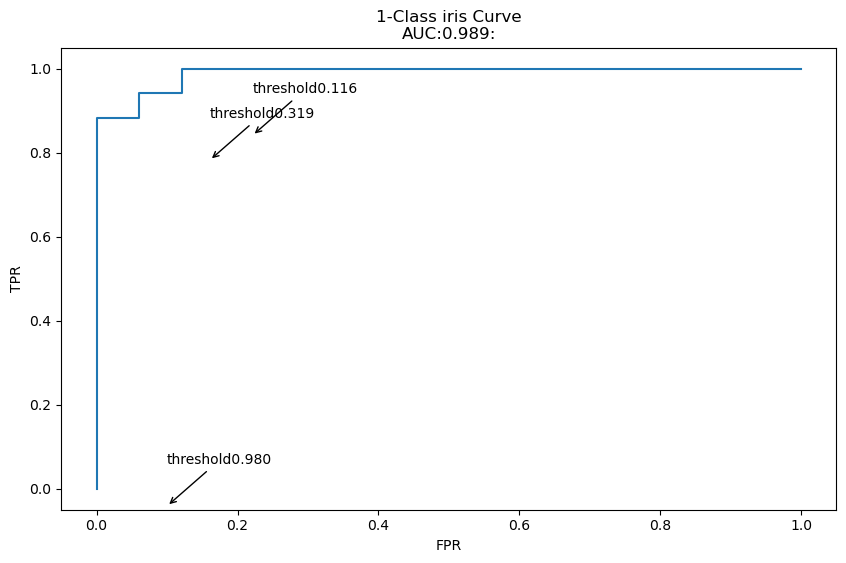

In [51]:
# plotting the auc
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(fpr, tpr)
ax.set_title(f"1-Class iris Curve\nAUC:{auc:.3f}:")
ax.set_xlabel("FPR")
ax.set_ylabel("TPR")
investigate = np.array([1, 3, 5])
for index in investigate:
    th, f, t = threshold[index], fpr[index], tpr[index]
    ax.annotate(f"threshold{th:.3f}", xy=(f+0.1, t-0.1), xytext=(f+0.1, t), arrowprops={"arrowstyle":"->"})

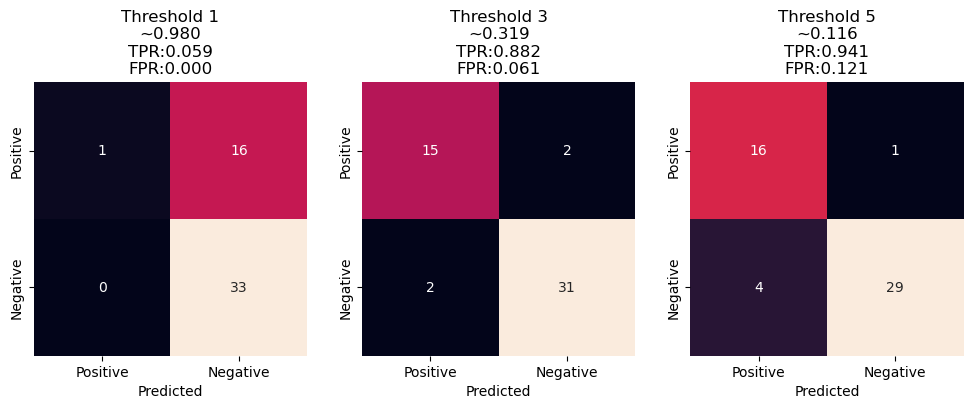

In [72]:
title_fmt = "Threshold {}\n~{:5.3f}\nTPR:{:.3f}\nFPR:{:.3f}"
pn = ["Positive", "Negative"]
add_args = {
    "xticklabels": pn,
    "yticklabels": pn,
    "square": True
}
fix, axes = plt.subplots(1, 3, sharey=False, figsize=(12, 4))
for ax, thresh_idx in zip(axes.flat, investigate):
    preds_at_th = pred_true < threshold[thresh_idx]
    cm = metrics.confusion_matrix(1-test_trgt, preds_at_th)
    sns.heatmap(cm, annot=True, cbar=False, ax=ax, **add_args)
    ax.set_xlabel("Predicted")
    ax.set_title(title_fmt.format(thresh_idx, threshold[thresh_idx], tpr[thresh_idx], fpr[thresh_idx]))

Text(0.5, 1.0, '10 Fold AUCs')

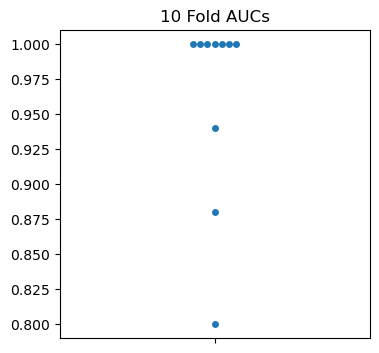

In [79]:
# plot of various AUCs displayed simulataneously on a strip plot.
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
model = neighbors.KNeighborsClassifier(n_neighbors=3)
cv_auc = skms.cross_val_score(model, dataset.data, dataset.target == 1, scoring="roc_auc", cv=10)
ax = sns.swarmplot(cv_auc, orient="v")
ax.set_title("10 Fold AUCs")